['report_tram_0001.json', 'report_train_0001.json', 'report_car_0001.json', 'report_bicycle_0001.json', '.ipynb_checkpoints', 'report_bus_0001.json', 'report_foot_0001.json']
report_tram_0001.json
report_train_0001.json
report_car_0001.json
report_bicycle_0001.json
report_bus_0001.json
report_foot_0001.json
foot
bicycle
bus
car
tram
train


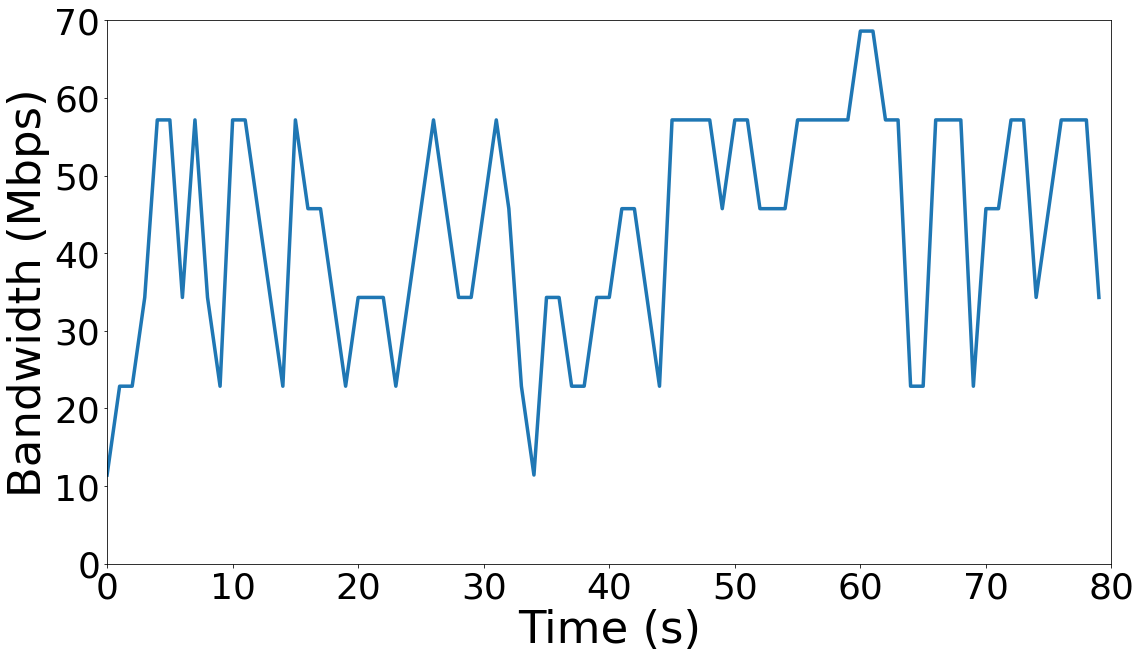

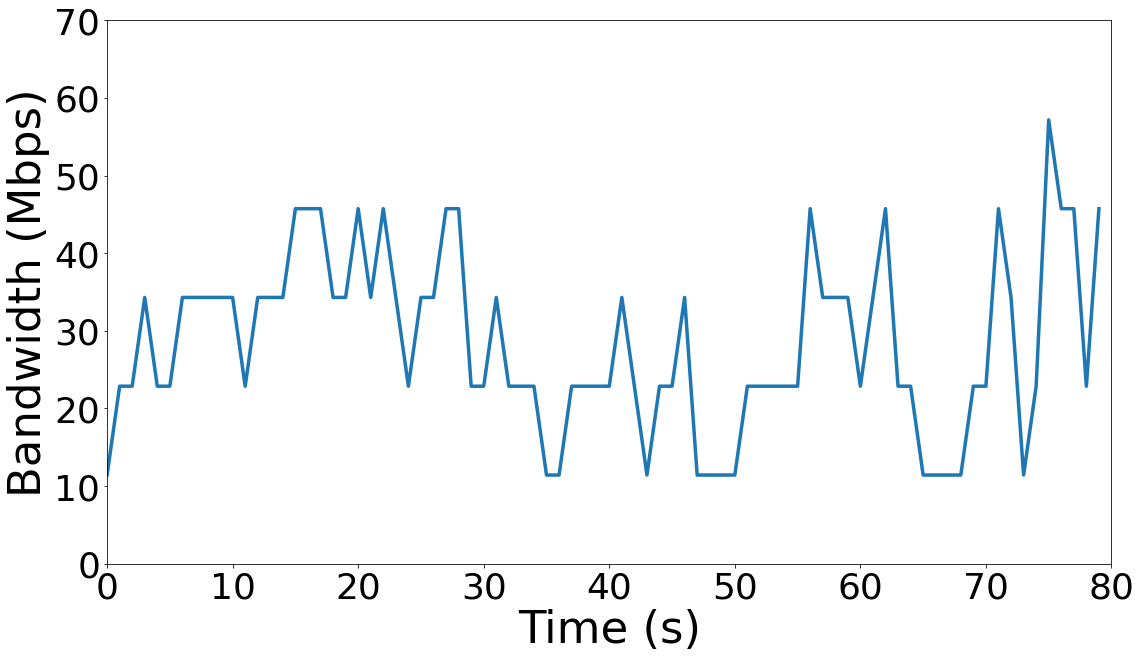

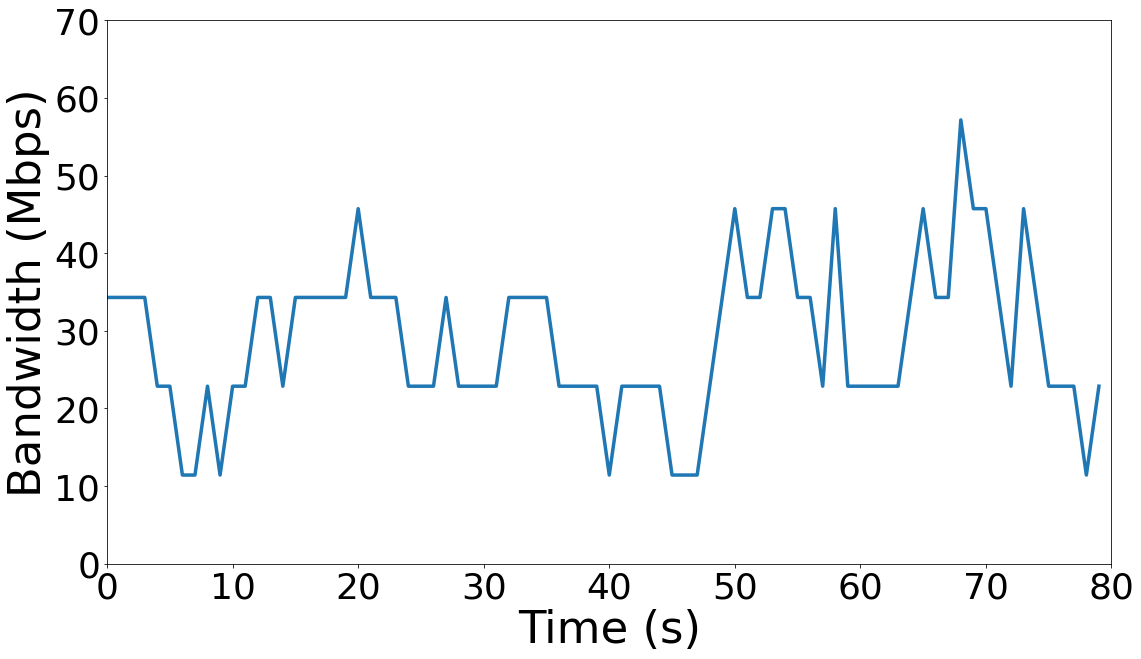

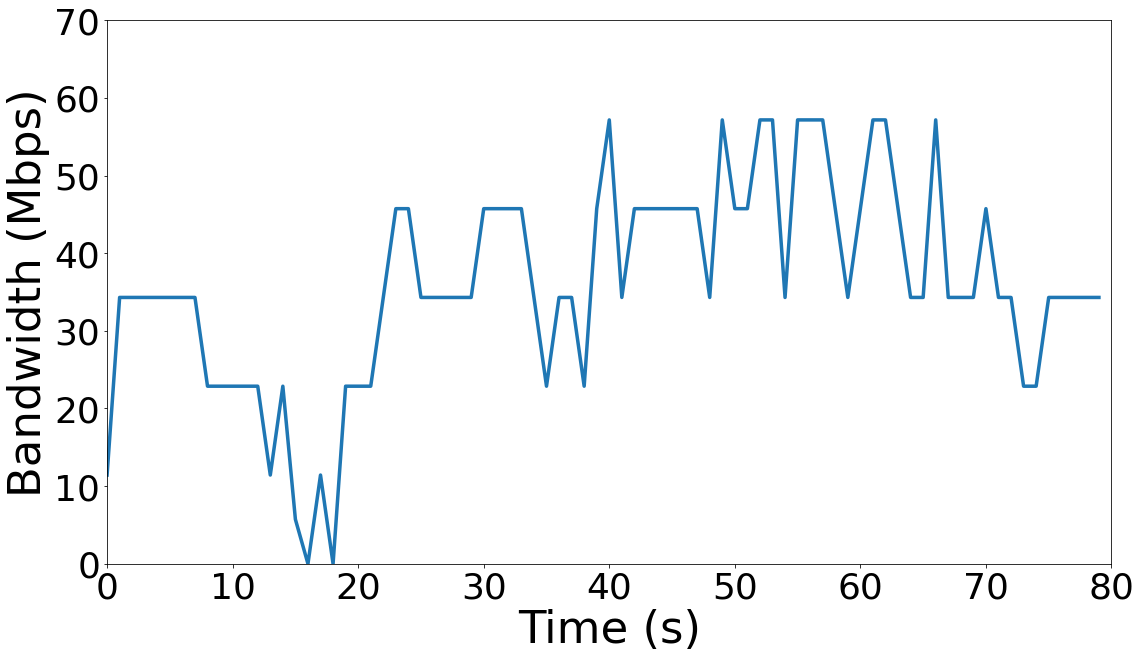

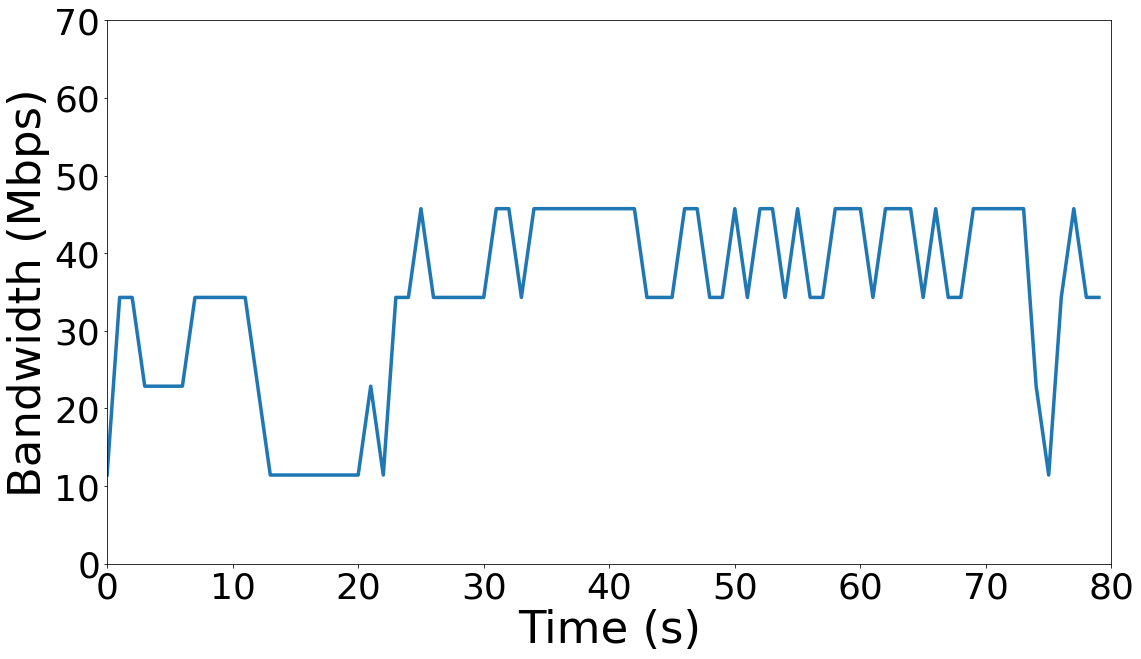

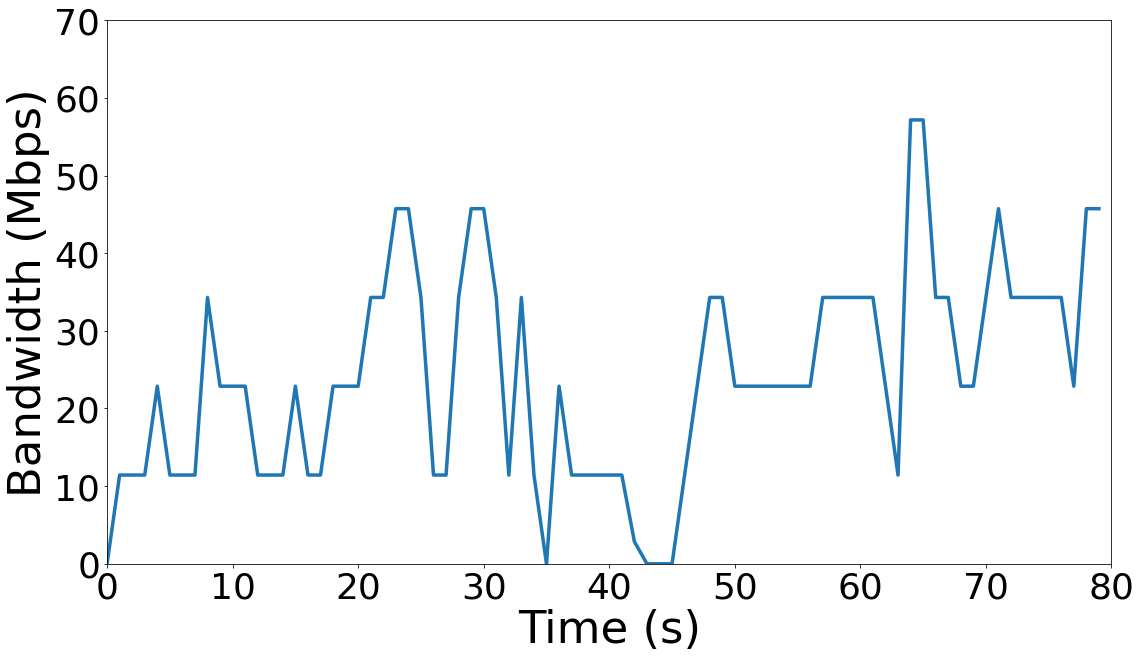

In [41]:
import numpy as np
import json
import os 
from matplotlib import pyplot as plt 

LINE_WIDTH=3.5
FONT_SIZE = 45


base_dir = "./bandwidth"
file_list = os.listdir(base_dir)
print(file_list)

SCENARIOS = ["foot", "bicycle", "bus", "car", "tram", "train"]
data = {}
for s in SCENARIOS:
    data[s] = []

for file in file_list:
    if('json' in file):
        print(file)
        with open(os.path.join(base_dir,file)) as f:
            scenario = file.split('_')[1]
            json_data = json.load(f)
            bandwidth = json_data["trace"]
            data[scenario] = bandwidth

for key in data:
    print(key)
            
for i in range(len(SCENARIOS)):
    plt.figure(figsize=(18,10))#设置画布的尺寸

    # plot_range = [400,500]
    # plot_len = plot_range[1] - plot_range[0]
    plot_len = 80

    plt.plot(list(range(plot_len)), data[SCENARIOS[i]][0:plot_len], linewidth=LINE_WIDTH)

    # plt.title(f"{SCENARIOS[i]}", fontsize=30, horizontalalignment="center")
    #设置坐标标签标注和字体大小
    plt.xlabel("Time (s)",fontsize=FONT_SIZE)
    plt.ylabel("Bandwidth (Mbps)",fontsize=FONT_SIZE)

    #设置坐标刻度字体大小
    plt.xticks(fontsize=FONT_SIZE*0.8)
    plt.yticks(fontsize=FONT_SIZE*0.8)
    plt.ylim(0,70)
    plt.xlim(0,80)

    plt.savefig(f"./plots/{SCENARIOS[i]}.png",bbox_inches = 'tight')
    plt.show()
